In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#getting the data ready
df = pd.read_csv("C:\HItman\Personal\study\Buisiness Analyst\Python_Diwali_Sales_Analysis-main\env\Diwali Sales Data.csv", encoding='iso-8859-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.shape

(11251, 15)

In [10]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [3]:
#dropping the last 2 columns
df = df.drop(['Status' , 'unnamed1'], axis=1)

In [21]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [4]:
#checking for Null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

#When checked for null value we indefied we have 12 null values in Amount

In [5]:
#dropping null values
df.dropna(inplace=True)

In [6]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [7]:
df.shape

(11239, 13)

In [7]:
#changing the datatype for column Amount to Integer
df['Amount'] = df['Amount'].astype('int')

In [8]:
df['Amount'].dtype

dtype('int32')

# Exploratory Data Analysis

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Gender

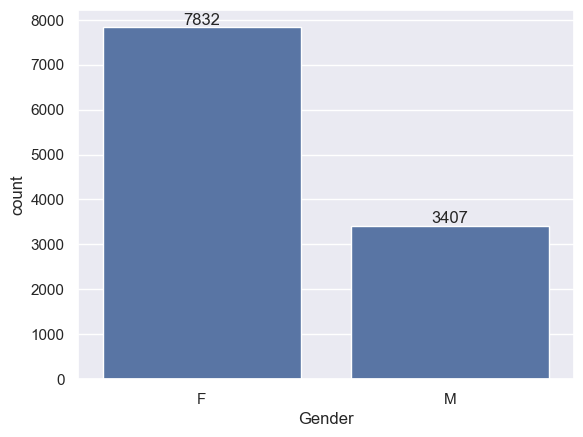

In [18]:
#plotting a bar chart for Gender and it's count
ax = sns.countplot(data = df, x = 'Gender')

for bars in ax.containers:
 ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

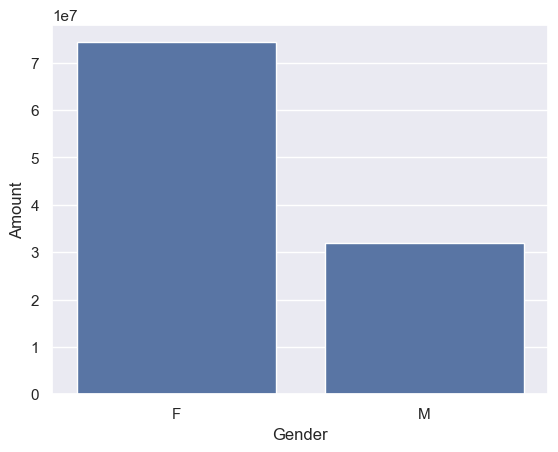

In [17]:
#plotting a bar graph for Gender VS Total Amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### AGE

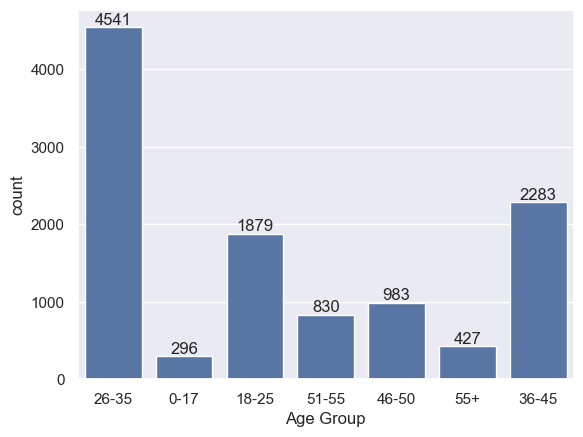

In [24]:
ax = sns.countplot(data = df, x = 'Age Group')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

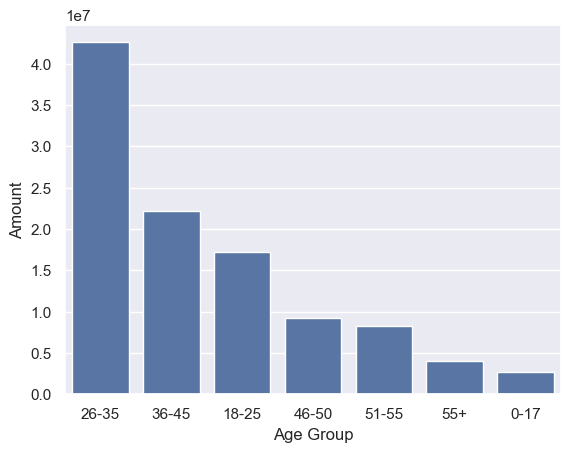

In [27]:
#plotting bar graph for Age Group VS Total Amount

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

<Axes: xlabel='State', ylabel='Orders'>

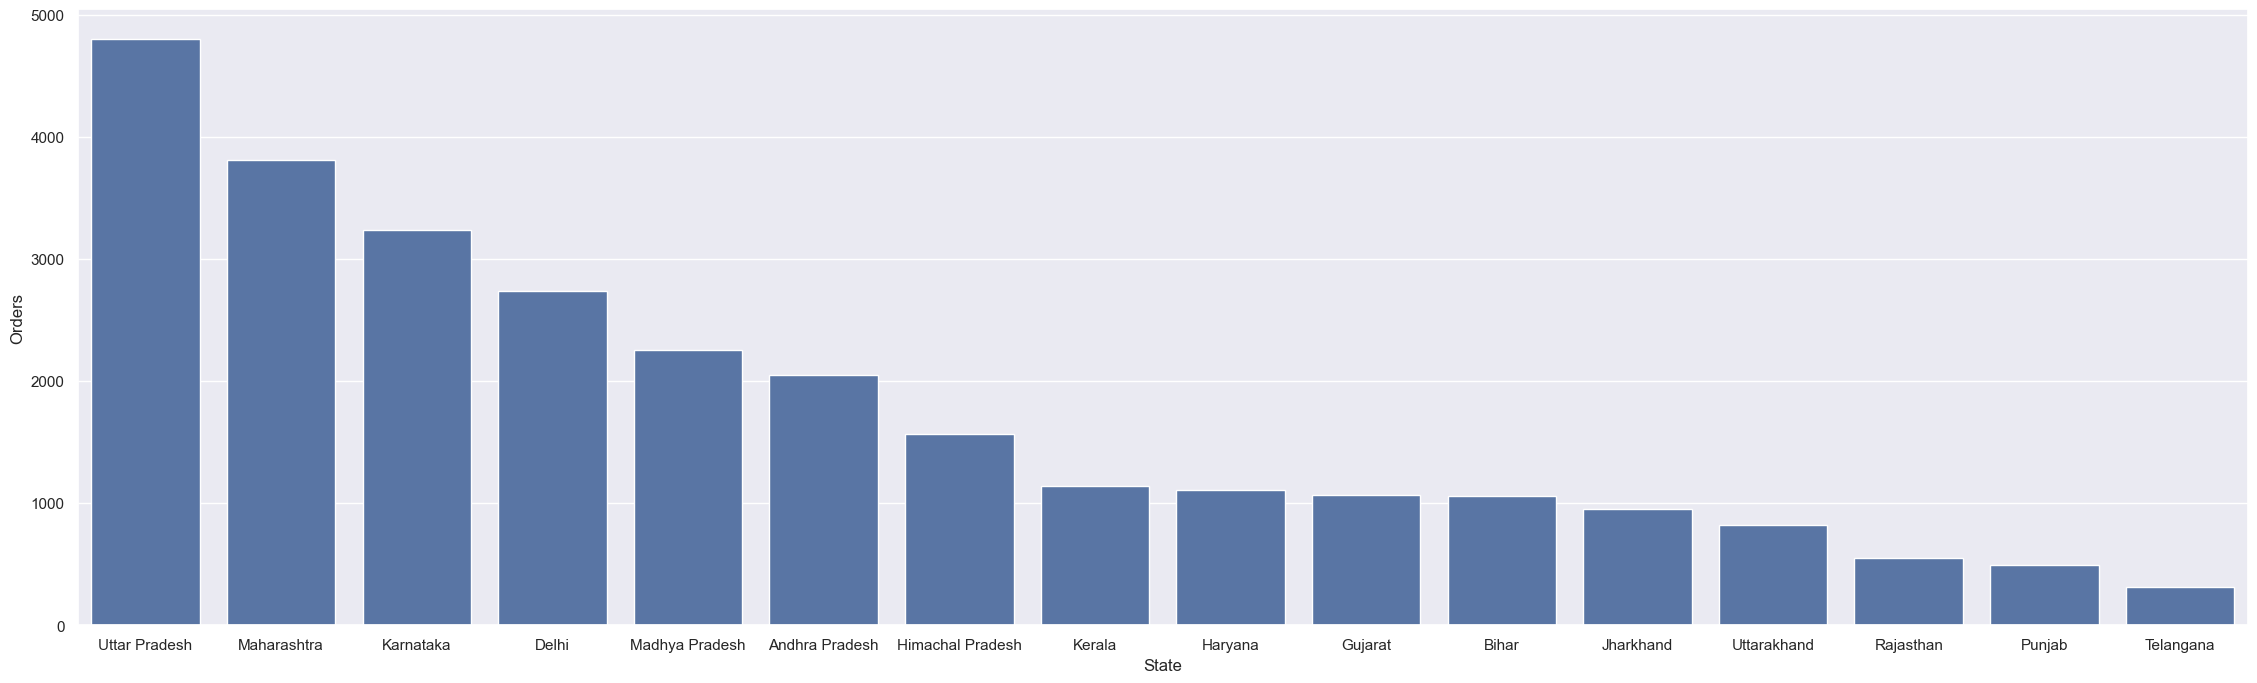

In [21]:
#total number of orders from top 10 States

order_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending=False)

sns.set(rc={'figure.figsize':(28,8)})
sns.barplot(x = 'State', y = 'Orders', data=order_state)

<Axes: xlabel='State', ylabel='Amount'>

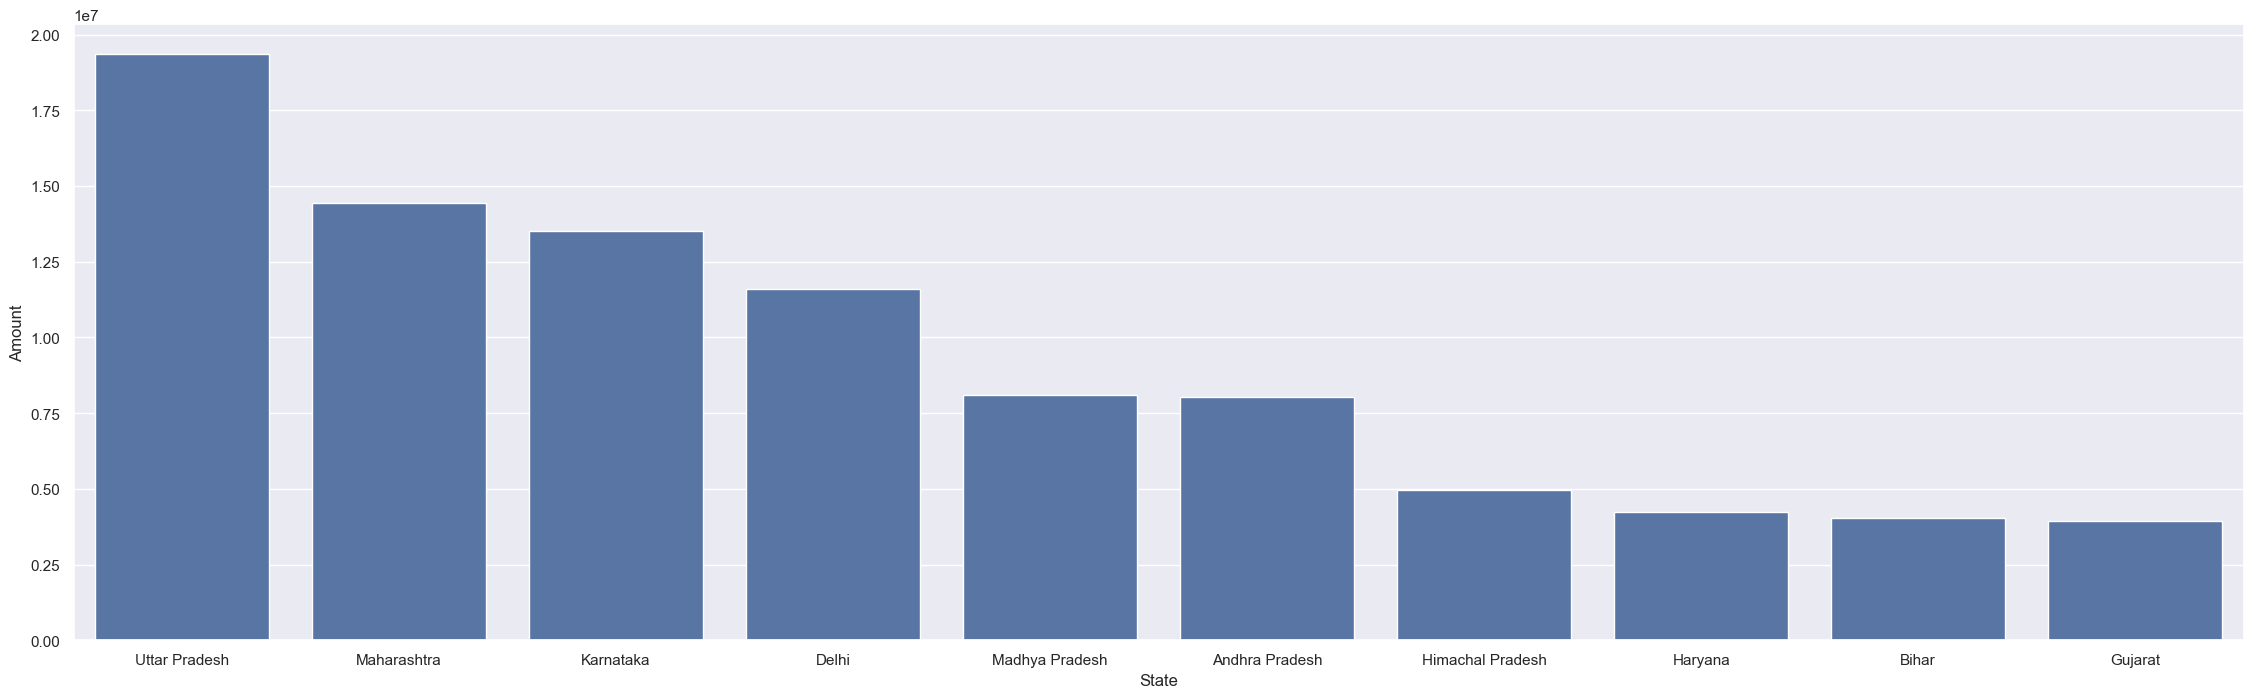

In [23]:
#plotting graph for State VS Total Amount

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)

sns.barplot(x = 'State', y = 'Amount', data=sales_state)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

### Marital Status

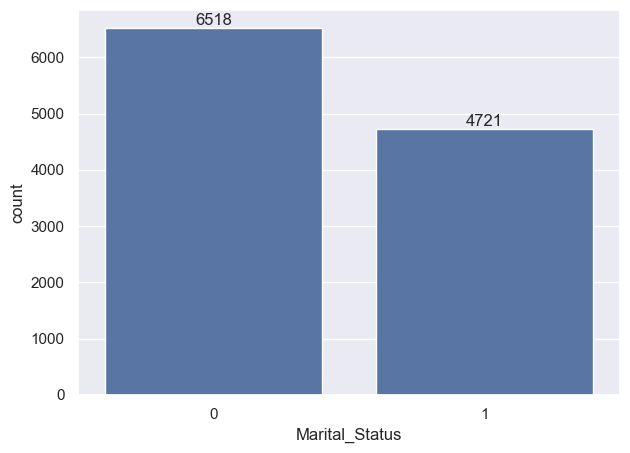

In [28]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc = {'figure.figsize':(8,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

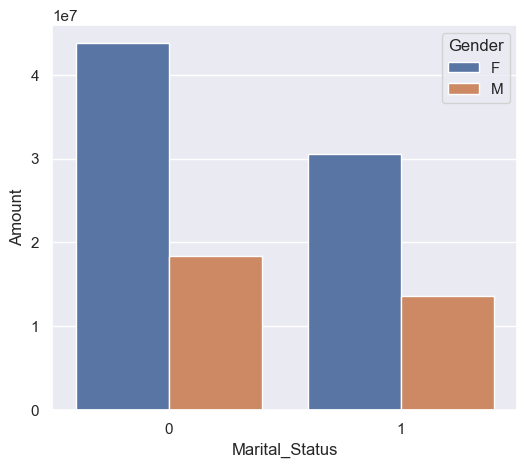

In [31]:
sales_ms = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

sns.set({'figure.figsize' : (6,5)})
sns.barplot(x='Marital_Status', y = 'Amount', data=sales_ms, hue = 'Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

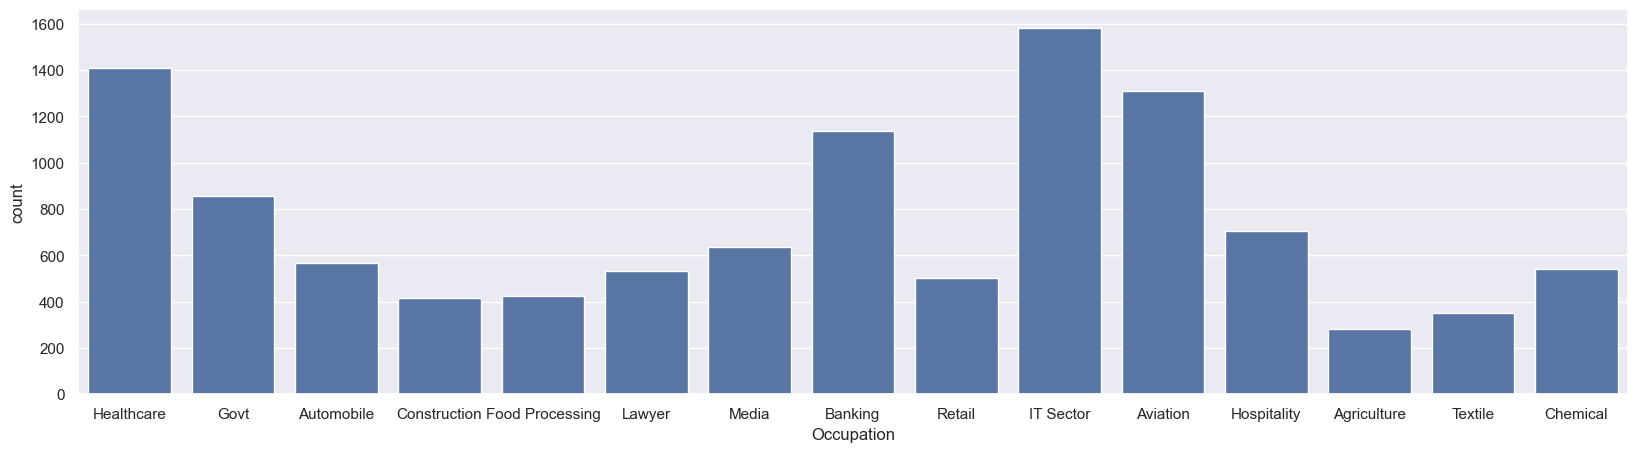

In [35]:
sns.set({'figure.figsize' : (20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bar in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

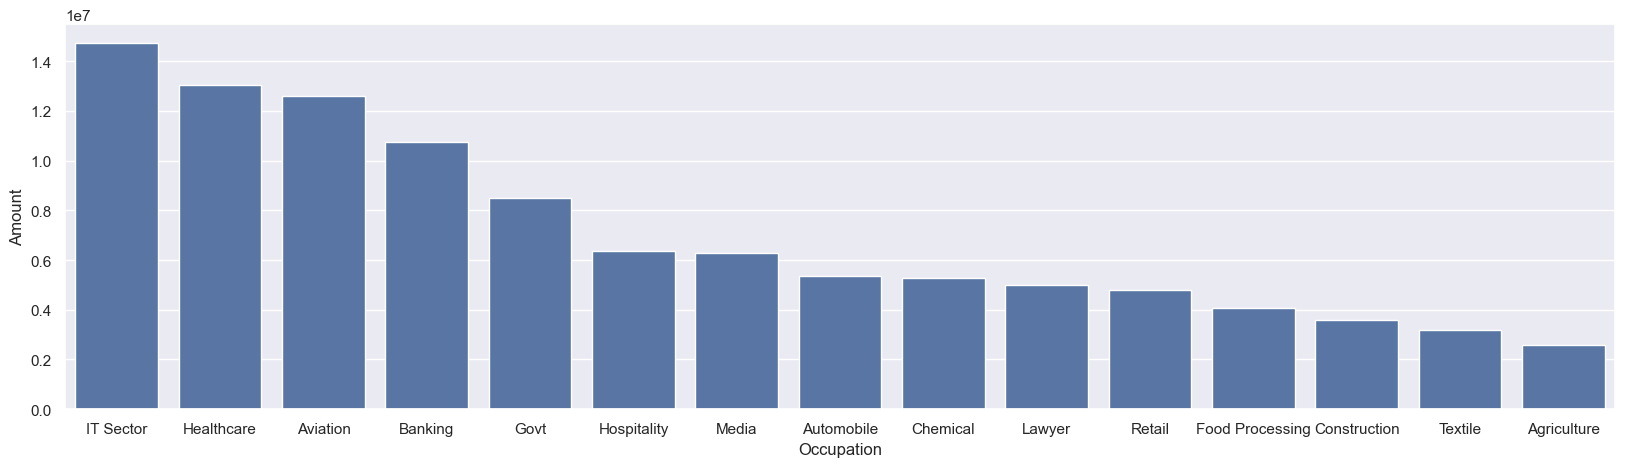

In [40]:
#plotting bar graphg for Occupation VS Total Amount

sales_occ = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

sns.set({'figure.figsize' : (20,5)})
sns.barplot(x = 'Occupation', y = 'Amount', data= sales_occ)

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Categories